In [1]:
import pandas as pd
import numpy as np
from DataReader.XMLReader import get_bawe_texts
from tqdm.notebook import tqdm
import csv
import matplotlib
import matplotlib.pyplot as plt
from essay_evaluation.pipeline import Pipeline

In [2]:
bawe_folder = "/usr/local/datasets/bawe/"
bawe_texts = get_bawe_texts(bawe_folder)

In [3]:
len(bawe_texts)

2761

In [6]:
pipeline = Pipeline()
docs = []

for text in tqdm(bawe_texts):
    docs.append(pipeline(text))


In [7]:
token_num = []
for doc in docs:
    token_num.append(len(doc))
len(token_num)

2761

In [8]:
token_df = pd.DataFrame(token_num, columns=['#Tokens'])
token_df

,#Tokens
0,3069
1,3576
2,6748
3,1417
4,2335
...,...
2756,1510
2757,2029
2758,4083
2759,1065


In [29]:
token_df.sort_values(by=['#Tokens']).reset_index().to_csv('sorted_tokens_bawe.csv')

In [26]:
from collections import defaultdict
d = defaultdict(lambda : 0)

for num in token_num:
    d[num] += 1
sorted_keys = sorted(d.keys())
sorted_d = defaultdict(lambda : 0)
for key in sorted_keys:
    sorted_d[key] = d[key]

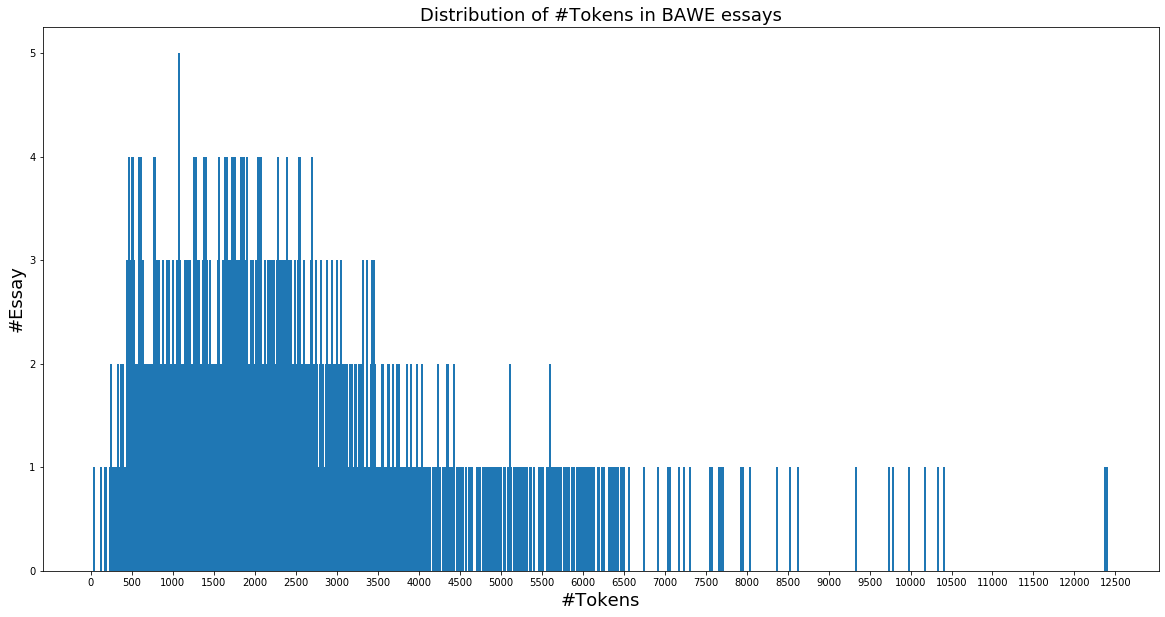

In [57]:
matplotlib.rc('figure', figsize=(20, 10))
plt.bar(sorted_d.keys(), height=sorted_d.values(), width=25)
plt.title("Distribution of #Tokens in BAWE essays", fontdict={'size': 18})
plt.xlabel("#Tokens", fontdict={'size': 18})
plt.ylabel("#Essay", fontdict={'size': 18})
plt.xticks(np.arange(0, 13000, 500))
plt.show()

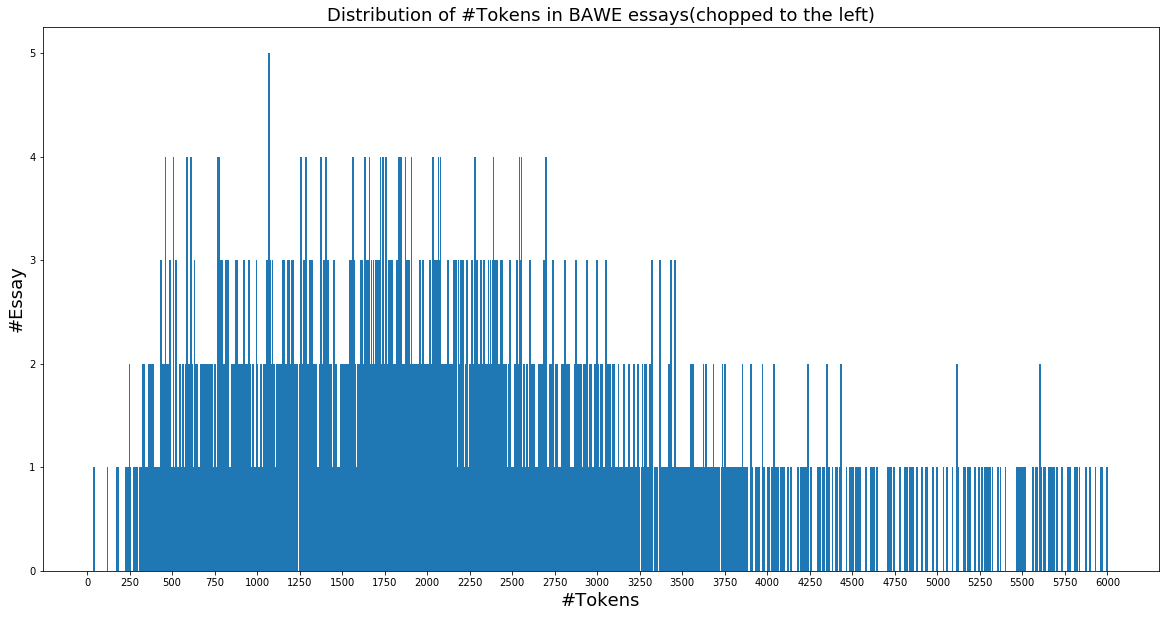

In [61]:
chopped_sorted_d = defaultdict(lambda:0)

for key in sorted_d.keys():
    if key < 6000:
        chopped_sorted_d[key] = sorted_d[key]

matplotlib.rc('figure', figsize=(20, 10))
plt.bar(chopped_sorted_d.keys(), height=chopped_sorted_d.values(), width=10)
plt.title("Distribution of #Tokens in BAWE essays(chopped to the left)", fontdict={'size': 18})
plt.xlabel("#Tokens", fontdict={'size': 18})
plt.ylabel("#Essay", fontdict={'size': 18})
plt.xticks(np.arange(0, 6250, 250))
plt.show()

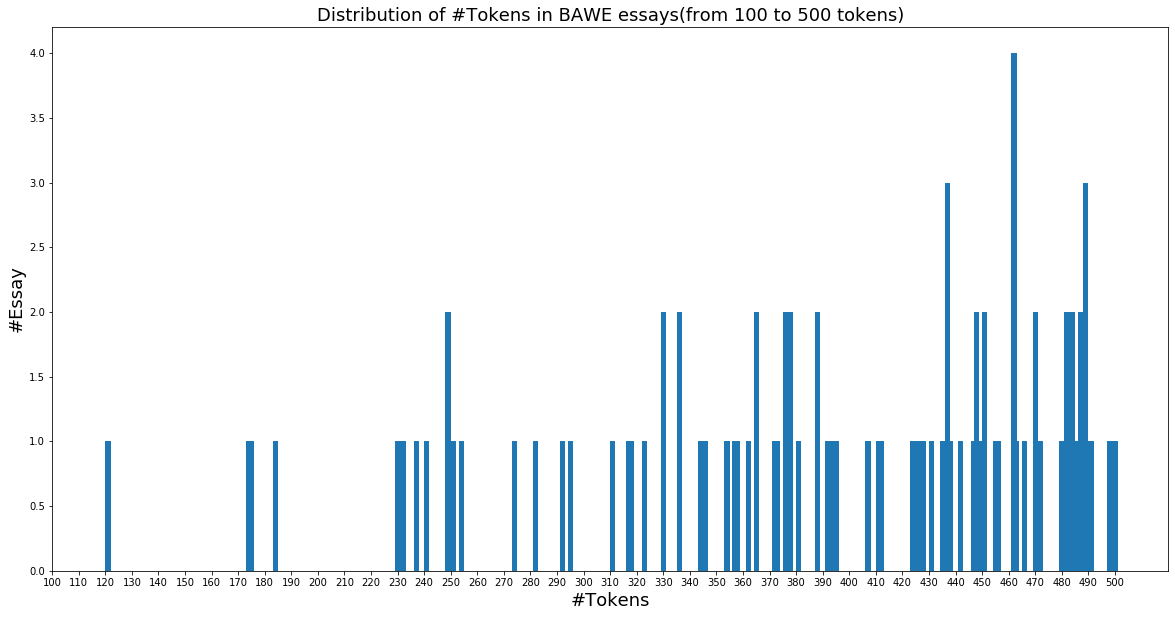

In [66]:
chopped_sorted_d = defaultdict(lambda:0)

for key in sorted_d.keys():
    if key <= 500 and key >= 100:
        chopped_sorted_d[key] = sorted_d[key]

matplotlib.rc('figure', figsize=(20, 10))
plt.bar(chopped_sorted_d.keys(), height=chopped_sorted_d.values(), width=2)
plt.title("Distribution of #Tokens in BAWE essays(from 100 to 500 tokens)", fontdict={'size': 18})
plt.xlabel("#Tokens", fontdict={'size': 18})
plt.ylabel("#Essay", fontdict={'size': 18})
plt.xticks(np.arange(100, 510, 10))
plt.show()

In [69]:
essays_in_frame = sum(chopped_sorted_d.values())
print(f"Total number of essays in this frame is: {essays_in_frame} essays")

Total number of essays in this frame is: 92 essays


In [50]:

data  = [np.around(np.mean(token_num), 2), np.around(np.std(token_num), 2), 
                               np.median(token_num).astype('int32'), np.min(token_num).astype('int32'), np.max(token_num).astype('int32')]
data = np.array(data)
descriptive_df = pd.DataFrame([data], 
                              columns=["Mean", "Std", "Median", "Min", "Max"])
descriptive_df.Median = descriptive_df.Median.astype('int32')
descriptive_df.Min = descriptive_df.Min.astype('int32')
descriptive_df.Max = descriptive_df.Max.astype('int32')
print("Descriptive statistics for #Tokens in BAWE")
descriptive_df

Descriptive statistics for #Tokens in BAWE


,Mean,Std,Median,Min,Max
0,2163.66,1349.43,1949,42,12395


### 10 first levels

In [77]:

final_dataset_path = "/usr/local/datasets/flip_final.csv"
df = pd.read_csv(final_dataset_path)
df = df.replace(np.nan, '', regex=True)#Replace empty fields from nan to a ''
#Filter empty essays, session 1, 3, 5
df = df.query("Essay != '' and Session != 'Session 1' and Session != 'Session 3' and Session != 'Session 5'and Vocab_Grade_1st != '' and Vocab_Grade_2nd != ''")
len(df)

407

In [78]:
dataset_docs = []
for text in tqdm(df['Essay']):
    dataset_docs.append(pipeline(text))



In [81]:
df = df.reset_index()

In [98]:
essay_level_counting = defaultdict(lambda:0)

for idx, doc in tqdm(enumerate(dataset_docs)):
    #Level 1
    if (df.loc[idx, 'Level'] == "A1.1" or df.loc[idx, 'Level'] == "A1.2") and df.loc[idx, 'Vocab_Grade_AVG'] < 3.5:
        essay_level_counting[1] += 1
    if (df.loc[idx]['Level'] == "A1.1" or df.loc[idx]['Level'] == "A1.2") and df.loc[idx]['Vocab_Grade_AVG'] >= 3.5:
        essay_level_counting[2] += 1
    if (df.loc[idx]['Level'] == "A2.1" or df.loc[idx]['Level'] == "A2.2") and df.loc[idx]['Vocab_Grade_AVG'] < 3.5:
        essay_level_counting[3] += 1
    if (df.loc[idx]['Level'] == "A2.1" or df.loc[idx]['Level'] == "A2.2") and df.loc[idx]['Vocab_Grade_AVG'] >= 3.5:
        essay_level_counting[4] += 1
    if (df.loc[idx]['Level'] == "B1.1" or df.loc[idx]['Level'] == "B1.2") and df.loc[idx]['Vocab_Grade_AVG'] < 3.5:
        essay_level_counting[5] += 1
    if (df.loc[idx]['Level'] == "B1.1" or df.loc[idx]['Level'] == "B1.2") and df.loc[idx]['Vocab_Grade_AVG'] >= 3.5:
        essay_level_counting[6] += 1
    if (df.loc[idx]['Level'] == "B2.1" or df.loc[idx]['Level'] == "B2.2") and df.loc[idx]['Vocab_Grade_AVG'] < 3.5:
        essay_level_counting[7] += 1
    if (df.loc[idx]['Level'] == "B2.1" or df.loc[idx]['Level'] == "B2.2") and df.loc[idx]['Vocab_Grade_AVG'] >= 3.5:
        essay_level_counting[8] += 1
    if (df.loc[idx]['Level'] == "C1.1" or df.loc[idx]['Level'] == "C1.2") and df.loc[idx]['Vocab_Grade_AVG'] < 3.5:
        essay_level_counting[9] += 1
    if (df.loc[idx]['Level'] == "C1.1" or df.loc[idx]['Level'] == "C1.2") and df.loc[idx]['Vocab_Grade_AVG'] >= 3.5:
        essay_level_counting[10] += 1

2761

In [83]:
essay_level_counting

defaultdict(<function __main__.<lambda>()>,
            {5: 83, 7: 116, 3: 58, 6: 6, 9: 113, 1: 24, 8: 4, 2: 2, 4: 1})

In [99]:
for key in sorted(essay_level_counting.keys()):
    print(key, essay_level_counting[key])

1 19
2 7
3 44
4 15
5 59
6 30
7 69
8 51
9 47
10 66


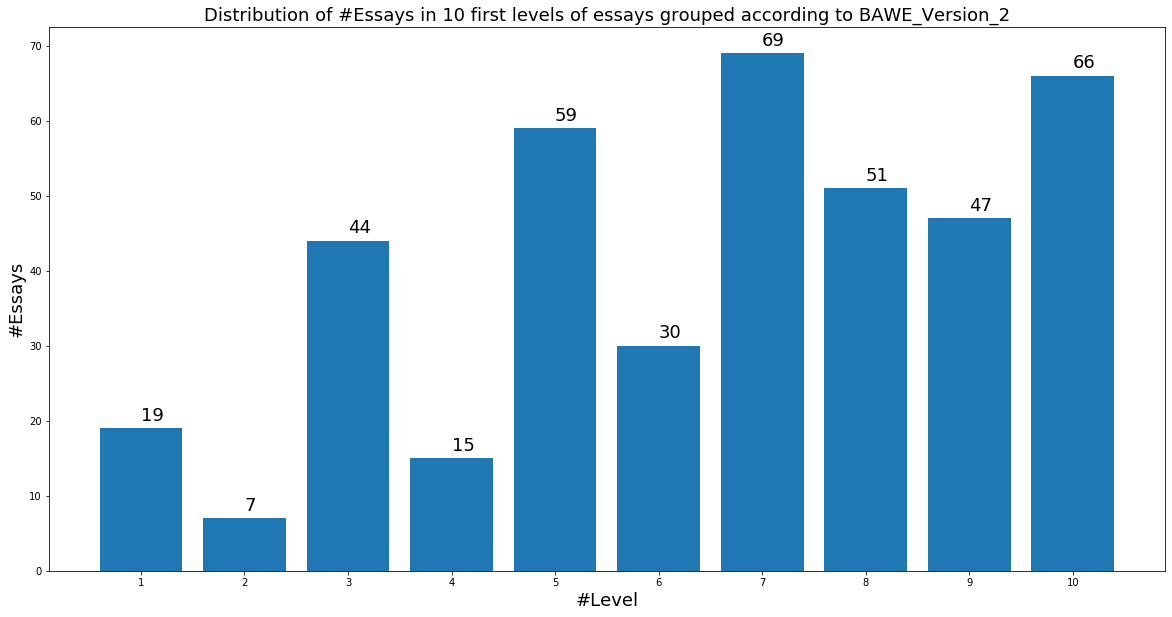

In [113]:
sorted_essay_level_counting = defaultdict(lambda:0)

for key in essay_level_counting.keys():
    sorted_essay_level_counting[key] = essay_level_counting[key]

matplotlib.rc('figure', figsize=(20, 10))
plt.bar(sorted_essay_level_counting.keys(), height=sorted_essay_level_counting.values())
plt.title("Distribution of #Essays in 10 first levels of essays grouped according to BAWE_Version_2", fontdict={'size': 18})
plt.xlabel("#Level", fontdict={'size': 18})
plt.ylabel("#Essays", fontdict={'size': 18})
plt.xticks(list(sorted_essay_level_counting.keys()))
for key, value in sorted_essay_level_counting.items():
    plt.text(key, value+1, value, fontdict={'size': 18})
plt.show()

In [ ]:
token_num = []
for doc in docs:
    token_num.append(len(doc))
len(token_num)

token_df = pd.DataFrame(token_num, columns=['#Tokens'])
token_df